In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#countries names are object while all other data is in numerical form.
#we have to divide countries in 3 based on the various factors in order to classify them developing , underdeveloped and developed countries.

In [6]:
#exports , imports and health are in % of gdpp

In [7]:
df["exports"]=df["exports"]*df["gdpp"]/100
df["imports"]=df["imports"]*df["gdpp"]/100
df["health"]=df["health"]*df["gdpp"]/100

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


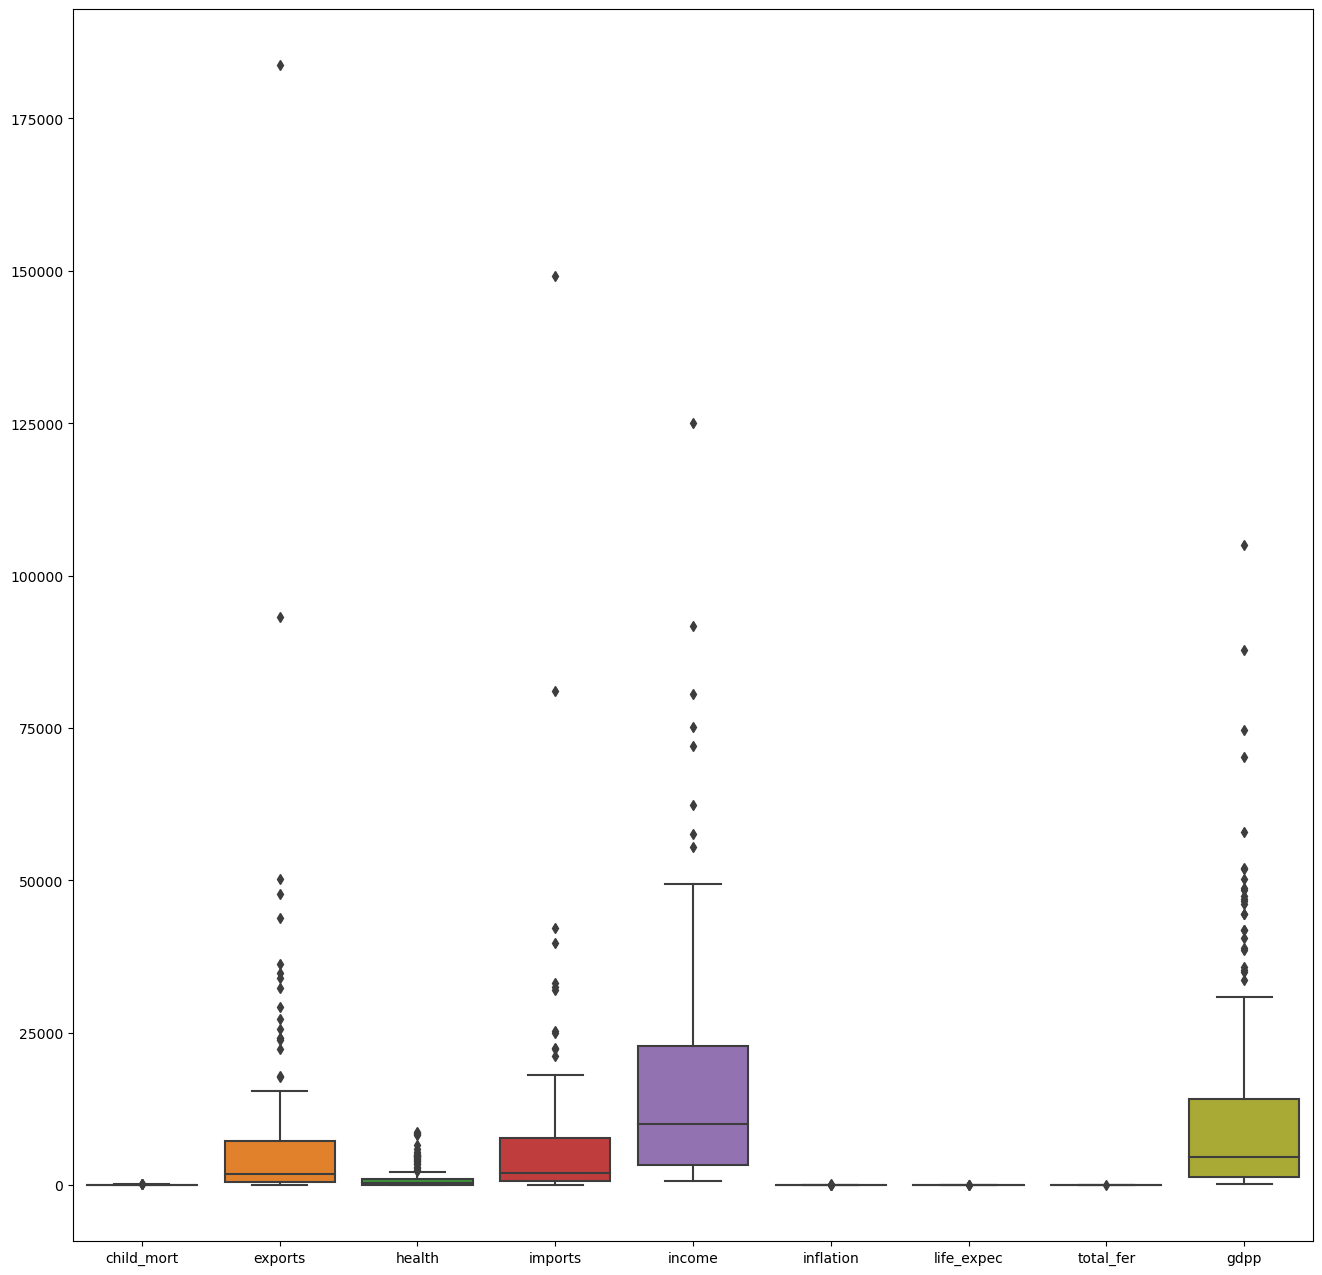

In [10]:
fig=plt.figure(figsize=(16,16))
sns.boxplot(data=df)
plt.show()

In [11]:
#there are some outliers in exports, health , imports , income , and gdpp which can be seen from the box plot.
# the scale is also different for parameters.

In [12]:
df.shape

(167, 10)

In [13]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [14]:
#there are no null values in the data

In [15]:
dup=df[df.duplicated()]

In [16]:
dup

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [17]:
#there are no duplicates in the data

In [18]:
X=df.drop(columns="country",axis=1)

In [19]:
Y=df["country"]

In [20]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [21]:
Y

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

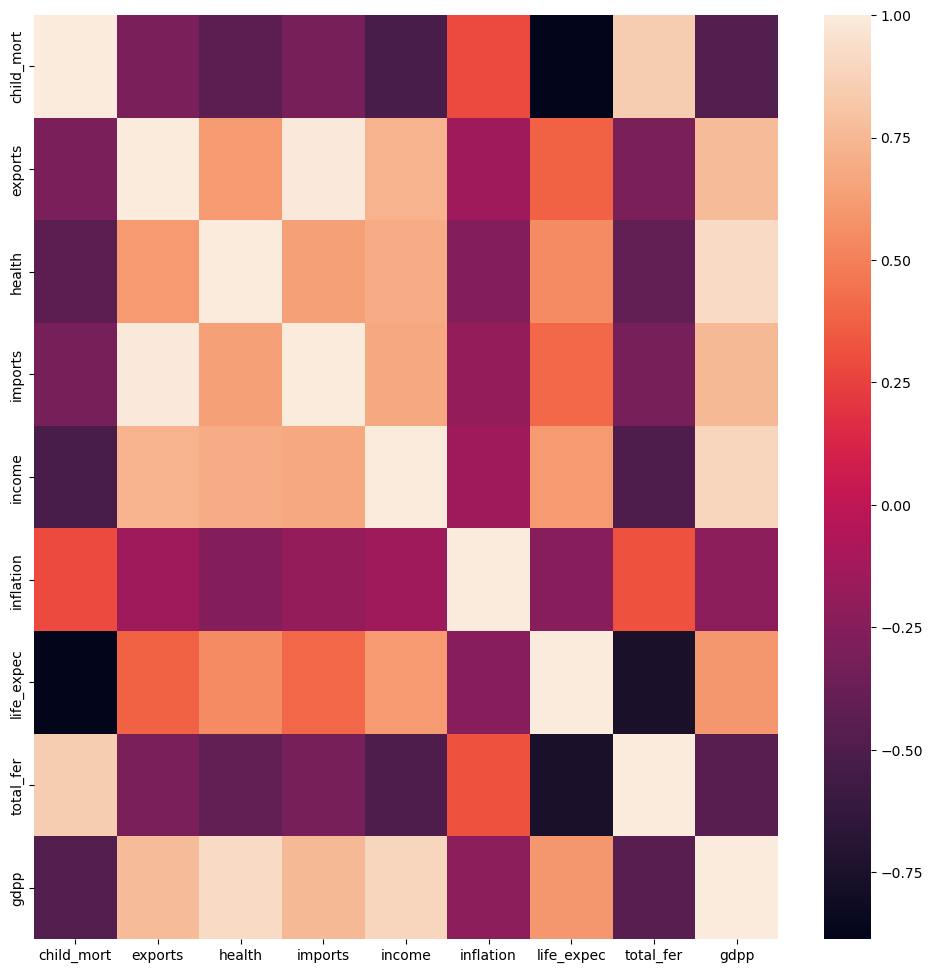

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr())
plt.show()

In [23]:
X.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [24]:
#child mortality has good negative correlation with life expectancy and total fertility
#expott has possitive correlation with imports , income and GDPP
#health has possitive correlation with income and GDPP
#income has good correlation with export and GDPP
#inflation donot have any good correlation with other factors
#life expectancy has good negative correlation with total fertility 
# total fertility has possitive correlation with child mortality and life expectancy
#GDPP has possitive correlation with exports , health , imports and income

In [25]:
#as data is standard and each data has very different min and max we need to do standardization.

from sklearn.preprocessing import StandardScaler

In [26]:
standard_scaler=StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [27]:
X_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [28]:
from sklearn.decomposition import PCA
pca=PCA()
X_PCA = pca.fit_transform(X)

In [29]:
print(X_PCA)

[[-2.13500212e+04  5.76045472e+03 -1.04134949e+03 ... -2.53929804e+00
   3.73254122e+00 -1.22378465e+00]
 [-1.37035592e+04  1.34897004e+03  1.45956692e+03 ... -2.22304829e+00
  -3.13556064e+00  6.94280862e-01]
 [-1.18541548e+04 -4.31695273e+02  3.14111151e+03 ...  7.73667252e+00
  -4.71164015e+00 -1.09551552e-01]
 ...
 [-1.86098704e+04  4.77960355e+03  2.65122475e+02 ...  4.03866224e+00
  -1.64248710e+00  8.24689725e-01]
 [-1.91409549e+04  4.17641542e+03  1.90162492e+02 ...  1.35970206e+01
  -9.67405174e-01 -8.81862122e-01]
 [-1.96349650e+04  4.87781078e+03 -6.31120111e+02 ...  1.92569080e+00
   9.35859092e+00 -1.00849870e+00]]


In [30]:
pca.components_

array([[-5.62259639e-04,  5.09713395e-01,  4.34004872e-02,
         4.07121906e-01,  5.41124926e-01, -6.04743283e-05,
         1.51299710e-04, -2.02834380e-05,  5.28908194e-01],
       [ 9.29683846e-04,  5.49213901e-01, -3.02404630e-02,
         5.12197282e-01, -5.60763776e-01,  1.93782343e-05,
        -2.23797377e-04,  3.13651621e-05, -3.47342226e-01],
       [-1.63893986e-04,  1.84494032e-01, -1.58859757e-01,
        -4.86711573e-02,  6.10605888e-01,  3.03918332e-04,
        -6.24835552e-05, -1.07495737e-05, -7.52008627e-01],
       [ 1.14131624e-02,  6.27936486e-01, -1.19153118e-01,
        -7.47813058e-01, -1.34795957e-01,  1.77372571e-03,
        -2.30738013e-03,  4.61772940e-04,  1.18173776e-01],
       [ 3.81062534e-03,  1.00746035e-01,  9.78652627e-01,
        -1.01152636e-01,  4.13857121e-02,  1.36679704e-03,
        -9.62964267e-04,  7.36740240e-05, -1.41870780e-01],
       [ 9.85231919e-01, -7.96492673e-03, -2.46989790e-03,
         8.91156296e-03,  2.34781529e-03,  5.378990

In [31]:
pca.explained_variance_ratio_

array([8.50201736e-01, 1.18932667e-01, 2.91343259e-02, 1.59752602e-03,
       1.32918035e-04, 7.39703394e-07, 7.65026841e-08, 1.02491403e-08,
       4.70002030e-10])

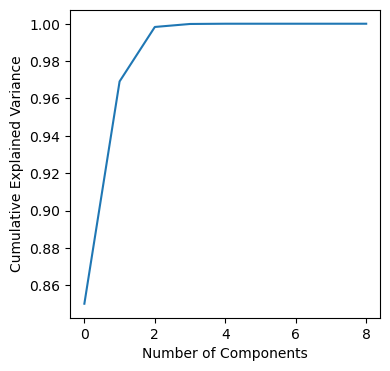

In [32]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
fig=plt.figure(figsize=(4,4))
plt.plot(cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [33]:
#with 2 PCA components we are able to explain approximately 98% of the variance

In [34]:
col = list(X.columns)
pca_df=pd.DataFrame({"Feature":col})

In [35]:
len(X.columns)

9

In [66]:
pca_df1=pd.DataFrame({"PC1":pc[0],"PC2":pc[1]})

In [67]:
pca_df1

,PC1,PC2
0,-2.635575,1.472267
1,-0.024206,-1.429892
2,-0.459557,-0.675495
3,-2.722630,2.172332
4,0.648597,-1.023437
...,...,...
162,-1.175210,-0.275652
163,-0.314228,-0.016266
164,-0.594449,-1.076335
165,-1.802372,0.588729


In [68]:
pca_df1.describe()

,PC1,PC2
count,1.670000e+02,1.670000e+02
mean,4.254747e-17,3.191060e-17
std,2.310046e+00,1.292310e+00
min,-3.937287e+00,-1.694220e+00
25%,-1.447294e+00,-9.750541e-01
50%,-3.574241e-01,-4.017902e-01
75%,8.494139e-01,6.800428e-01
max,1.264807e+01,8.276683e+00


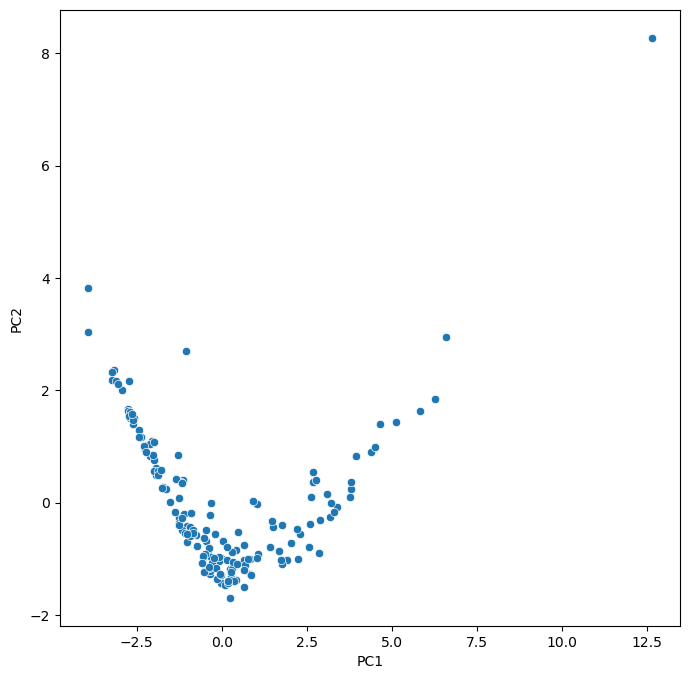

In [69]:
fig=plt.figure(figsize=(8,8))
sns.scatterplot(x="PC1",y="PC2",data=pca_df1)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [71]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [72]:
y_predicted=km.fit_predict(pca_df1[["PC1","PC2"]])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [73]:
df["cluster"]=y_predicted
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [75]:
km.cluster_centers_

array([[ 0.0306096 , -0.85474234],
       [ 3.99256762,  0.68883412],
       [-2.25683264,  1.20781697]])

In [76]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [84]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0
mean,20.112088,3676.577456,577.879675,3784.348034,14240.439560,6.641538,73.632967,2.221099,8288.153846,0.0
std,14.160170,3770.195393,625.341422,3474.178758,9502.146297,7.025842,4.046262,0.681933,7155.437126,0.0
min,3.200000,1.076920,19.463600,0.651092,1990.000000,-4.210000,63.000000,1.230000,592.000000,0.0
25%,10.250000,1000.575000,182.983500,1357.470000,7010.000000,1.730000,70.450000,1.590000,3075.000000,0.0
50%,17.100000,1946.700000,367.200000,2376.000000,11400.000000,4.910000,74.100000,2.160000,5840.000000,0.0
75%,25.800000,5292.800000,745.250000,5224.050000,19250.000000,8.970000,76.400000,2.635000,11600.000000,0.0
max,64.400000,15046.200000,2928.780000,14718.600000,45400.000000,45.900000,81.900000,4.340000,30700.000000,0.0


In [85]:
df2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,5.092593,31897.859259,4378.955185,26469.600000,50833.333333,3.120407,80.462963,1.775185,48759.259259,1.0
std,2.319470,35391.100193,2319.748714,28902.412807,21639.369392,4.399902,1.540017,0.293380,17757.777478,0.0
min,2.600000,6001.600000,1002.520000,6052.000000,28300.000000,-3.220000,76.500000,1.150000,21100.000000,1.0
25%,3.400000,12381.600000,2624.530000,11556.300000,37850.000000,0.803000,79.950000,1.490000,38700.000000,1.0
50%,4.300000,24059.700000,4475.530000,17710.000000,42900.000000,1.570000,80.500000,1.870000,46200.000000,1.0
75%,5.900000,34389.100000,5257.600000,28639.400000,56550.000000,3.780000,81.450000,1.965000,51100.000000,1.0
max,10.800000,183750.000000,8663.600000,149100.000000,125000.000000,16.700000,82.800000,2.210000,105000.000000,1.0


In [86]:
df3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,90.273469,886.379571,115.420504,840.814918,3975.163265,12.468061,59.381633,4.944082,1924.326531,2.0
std,35.226380,2229.475505,163.838723,1527.896176,5558.381274,15.693526,6.395821,1.078994,2897.205797,0.0
min,26.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.600000,103.250000,34.681900,193.578000,1390.000000,4.150000,56.800000,4.370000,553.000000,2.0
50%,89.300000,196.344000,52.269000,353.700000,1870.000000,8.920000,60.100000,5.050000,967.000000,2.0
75%,111.000000,589.490000,100.605000,1000.800000,3980.000000,16.600000,62.900000,5.560000,1480.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,2.0


In [82]:
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500,0


In [83]:
df["cluster"].value_counts()

cluster
0    91
2    49
1    27
Name: count, dtype: int64

In [87]:
#0 is developed countries , 1 is developing countries, 2 is underdeveloped countries